# **Take different kernals on dataset and tabulate the accuracy

In [ ]:
import pandas as pd

dt = pd.read_csv('bodyPerformance.csv')
dt.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
dt.columns


Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [ ]:
dt['class'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [ ]:
dt.rename(columns={'class': 'CLASS'}, inplace=True)

In [ ]:
dt.gender[dt.gender == 'M'] = 0
dt.gender[dt.gender == 'F'] = 1

<ipython-input-35-4073a5e87567>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.gender[dt.gender == 'M'] = 0
<ipython-input-35-4073a5e87567>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.gender[dt.gender == 'F'] = 1


In [ ]:
dt.CLASS[dt.CLASS == 'A'] = 1
dt.CLASS[dt.CLASS == 'B'] = 2
dt.CLASS[dt.CLASS == 'C'] = 3
dt.CLASS[dt.CLASS == 'D'] = 4


<ipython-input-37-93653c6942b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.CLASS[dt.CLASS == 'A'] = 1
<ipython-input-37-93653c6942b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.CLASS[dt.CLASS == 'B'] = 2
<ipython-input-37-93653c6942b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.CLASS[dt.CLASS == 'C'] = 3
<ipython-input-37-93653c6942b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [ ]:
dt

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,CLASS
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,3
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,3
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,3
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,4
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,4


In [ ]:
dt.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
CLASS                      0
dtype: int64

In [ ]:
dt.shape

(13393, 12)

In [ ]:
from sklearn import preprocessing

In [ ]:
x=dt.iloc[:, :-1]
y=dt.iloc[:,-1]
ge = preprocessing.LabelEncoder()
y = ge.fit_transform(y)
y

array([2, 0, 2, ..., 0, 3, 2])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
l=[]
d={1:'Linear_kernal',2:'RBF_kernal',3:'Polynomial_kernal',4:'Sigmoid'}

In [ ]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred))
l.append(accuracy_score(y_test,y_pred))

Accuracy Score:
0.6136618141097424


In [ ]:
svc1=SVC(kernel='rbf')
svc1.fit(x_train,y_train)
y_pred1=svc1.predict(x_test)
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred1))
l.append(accuracy_score(y_test,y_pred1))

Accuracy Score:
0.6842105263157895


In [ ]:
svc2=SVC(kernel='poly')
svc2.fit(x_train,y_train)
y_pred2=svc2.predict(x_test)
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred2))
l.append(accuracy_score(y_test,y_pred2))

Accuracy Score:
0.6274729376633073


In [ ]:
svc3=SVC(kernel='sigmoid')
svc3.fit(x_train,y_train)
y_pred3=svc3.predict(x_test)
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred3))
l.append(accuracy_score(y_test,y_pred3))

Accuracy Score:
0.41172079134005224


In [ ]:
l

[0.6136618141097424,
 0.6842105263157895,
 0.6274729376633073,
 0.41172079134005224]

No handles with labels found to put in legend.


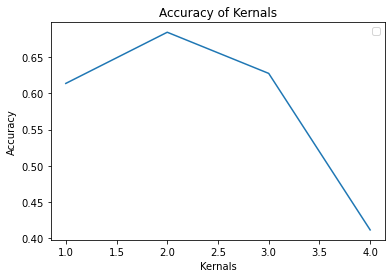

In [ ]:
import matplotlib.pyplot as plt
x1=[1,2,3,4]
y1=l
plt.plot(x1, y1)
plt.xlabel('Kernals')
plt.ylabel('Accuracy')
plt.title('Accuracy of Kernals')
plt.legend()
plt.show()